In [239]:
import pandas as pd
import numpy as np

from neural_network import Network
from activations import Tanh, Sigmoid, ReLU, LeakyReLU
from layers import ActivationLayer, FCLayer
from losses import MSE

train_ds= pd.read_csv("train.csv")
train_ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Explanation for Titanic data set
    * I would like to give an example from the "Fare" section in the Titanic dataset.
    * As you can see here, we have small integer values such as age, number of siblings, number of parents.
    * if we use deep learning methods without normalizing here, "Fare" values will suppress other values.
    * As a result, our margin of error will be higher.

# Prepare Dataset

In [240]:
train_ds = train_ds.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
train_ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Missing values


In [241]:
train_ds.columns[train_ds.isnull().any()]

Index(['Age', 'Embarked'], dtype='object')

In [242]:
train_ds.isnull().sum() #Bunları doldurmamız lazım.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [243]:
# Embarkedları dolduralım
train_ds[train_ds["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


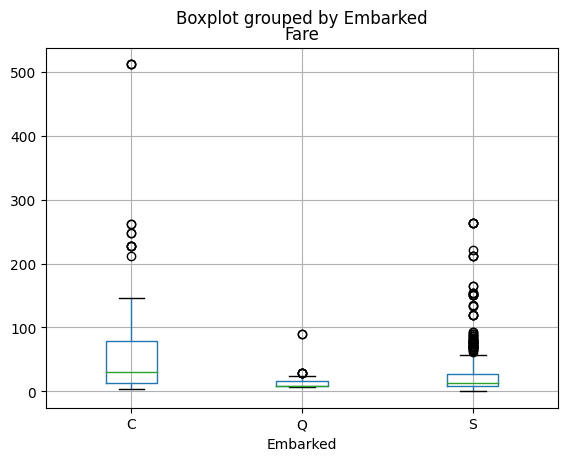

In [244]:
import matplotlib.pyplot as plt
train_ds.boxplot(column="Fare",by= "Embarked")
plt.show()

In [245]:
# Fare değeri 80 olanlar "C" Limanından binmişler. bununla dolduralım.
train_ds["Embarked"]= train_ds["Embarked"].fillna("C")
x= train_ds["Age"].mean()
train_ds["Age"]= train_ds["Age"].fillna(x)

In [246]:
train_ds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Change variables

In [247]:
train_ds["Sex"]= [0 if i == "male" else 1 if i =="female"  else 2 for i in train_ds["Sex"]]

In [248]:
train_ds["Embarked"]= [0 if i == "S" else 1 if i =="C"  else 2 for i in train_ds["Embarked"]]

In [249]:
train_ds

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


# We can talk about "normalization"

In [250]:
print("max fare : ",train_ds["Fare"].max(),"min fare : ",train_ds["Fare"].min()) 
print("max age : ",train_ds["Age"].max(),"min age : ",train_ds["Age"].min()) 
#We can see that If the "fare" height is too high, it will suppress the "age" value. so we need to normalize here.

max fare :  512.3292 min fare :  0.0
max age :  80.0 min age :  0.42


In [251]:

from sklearn.model_selection import train_test_split

train_ds_len= len(train_ds)

train = train_ds[:train_ds_len]
x_train = train.drop(labels= "Survived",axis=1)
y_train = train["Survived"]
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))


x_train 712
x_test 179
y_train 712
y_test 179


In [252]:
x_train = x_train.values.reshape((712, 1, 7))
y_train = y_train.values.reshape((712, 1, 1))

y_train[y_train == 1] = 1
y_train[y_train == 0] = -1

x_test = x_test.values.reshape((179, 1, 7))
y_test = y_test.values.reshape((179, 1, 1))

# Only for tanh
# How would this encoding change if you use sigmoid in the last layer?
y_test[y_test == 1] = 1
y_test[y_test == 0] = -1

In [253]:
net = Network()

net.add(FCLayer(7, 10))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(10, 20))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(20, 50))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(50, 20))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(20, 10))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(10, 1))
net.add(ActivationLayer(Tanh()))

net.use(MSE())
net.fit(x_train, y_train, epochs=500, learning_rate=0.001)

Epoch: 499 | Train loss: 0.6949: 100%|██████████| 500/500 [00:48<00:00, 10.31it/s]


# With normalization


In [254]:
n_train_ds = (train_ds - np.min(train_ds))/(np.max(train_ds)- np.min(train_ds)).values
n_train_ds

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.0
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.5
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.0
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.0
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.0
888,0.0,1.0,1.0,0.367921,0.125,0.333333,0.045771,0.0
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.5


In [255]:

from sklearn.model_selection import train_test_split

n_train_ds_len= len(n_train_ds)

train_2 = n_train_ds[:n_train_ds_len]
x_train_2 = train.drop(labels= "Survived",axis=1)
y_train_2 = train["Survived"]
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x_train_2,y_train_2,test_size=0.2,random_state=42)
print("x_train",len(x_train_2))
print("x_test",len(x_test_2))
print("y_train",len(y_train_2))
print("y_test",len(y_test_2))


x_train 712
x_test 179
y_train 712
y_test 179


In [256]:
x_train_2 = x_train_2.values.reshape((712, 1, 7))
y_train_2 = y_train_2.values.reshape((712, 1, 1))

y_train_2[y_train_2 == 1] = 1
y_train_2[y_train_2 == 0] = -1

x_test_2 = x_test_2.values.reshape((179, 1, 7))
y_test_2 = y_test_2.values.reshape((179, 1, 1))

# Only for tanh
# How would this encoding change if you use sigmoid in the last layer?
y_test_2[y_test_2 == 1] = 1
y_test_2[y_test_2 == 0] = -1

In [258]:
net = Network()

net.add(FCLayer(7, 10))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(10, 20))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(20, 50))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(50, 20))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(20, 10))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(10, 1))
net.add(ActivationLayer(Tanh()))

net.use(MSE())
net.fit(x_train_2, y_train_2, epochs=500, learning_rate=0.001)

Epoch: 499 | Train loss: 0.6521: 100%|██████████| 500/500 [00:44<00:00, 11.12it/s]


# Finally,

* a little bit different because i did not used very well in here.  Somethings are wrong. i'm gonna try to find where is the wrong and fixs it.

* Have a nice day 15/11/2022
* Oğuz Mete KAra
* CMPE 460